<center><h1>Cálculo Numérico</h1>
    <h2>Lista de Exercícios 03: Método de Newton</h2>
    <hr>
        <p>Aluno: Gabriel Brito Melandes
        <p>Curso: Ciência da Computação
        <p>Matricula: 171057600079
    </center>

<h3>Imports</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h3>Funções</h3>

In [2]:
def met_newton(F, F_dev, x0, qnt,prec):
    x = np.zeros(qnt)
    erro = []
    x[0] = x0
    for i in range (1, qnt):
        x[i] = x[i-1] - F(x[i-1])/F_dev(x[i-1])
        erro.append(abs(x[i]-x[i-1]))
        if erro[i-1] < prec:
            return x[i]

<h3>Exercícios</h3><hr><b>3.4.1.</b> <br> Encontre a raiz positiva da função $f(x) = cos(x) − x^2$ pelo método
de Newton inicializando-o com $x^{(0)} = 1$. Realize a iteração até obter estabilidade
no quinto dígito significativo.

In [3]:
def f(x):
    return np.cos(x) - x**2
def f1(x):
    return -np.sin(x) - 2*x

In [4]:
round(met_newton(f,f1,1,15,1e-5),5)

0.82413

<hr><b>3.4.2.</b> <br>Considere o problema de calcular as soluções positivas da equação:$$tg (x) = 2x^2$$. 

In [5]:
def f(x):
    return np.tan(x)-2*x**2

<h4>a) </h4>Use o método gráfico para isolar as duas primeiras raízes positivas em pequenos intervalos. Use a teoria para argumentar quanto à existência e unicidade das raízes dentro intervalos escolhidos.

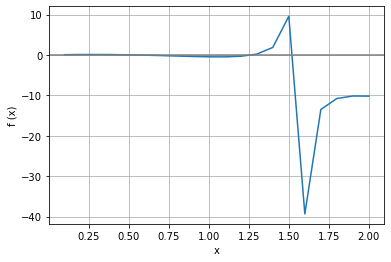

In [6]:
x = np.linspace(0.1,2,20)
y = np.tan(x)-2*x**2

plt.xlabel('x')
plt.ylabel('f (x)')
plt.plot(x,y)
plt.axhline(0, color='gray')
plt.grid()
plt.show()

Entre 0 e 0.75 possui uma raiz positiva e entre 1 e 1.5 possui outra raiz positiva. O salto para 1.5 na verdade deveria ser um f(x)negativo, mas como está sendo tracejado uma linha entre os pontos calculados, neste caso não é mostrado. Respondendo o item a, veja os graficos precisos abaixo.

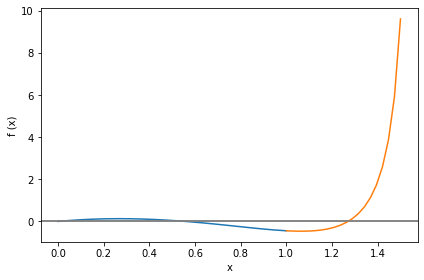

In [7]:
x = np.linspace(0,1,20)
y = np.tan(x)-2*x**2

plt.xlabel('x')
plt.ylabel('f (x)')
plt.plot(x,y)
plt.axhline(0, color='gray')
plt.grid()

x = np.linspace(1,1.5,20)
y = np.tan(x)-2*x**2

plt.xlabel('x')
plt.ylabel('f (x)')
plt.plot(x,y)
plt.axhline(0, color='gray')
plt.grid()


plt.tight_layout()

<h4>b)</h4> Calcule cada uma das raízes pelo método de Newton com oito dígitos significativos e discuta a convergência.

In [8]:
def f1(x):
    return (1/(np.cos(x))**2)-4*x

round(met_newton(f,f1,0.3,30,1e-8),8)

1.27034265

In [9]:
round(met_newton(f,f1,0.4,30,1e-8),8)

0.55970415

Veja que ao utilizar o chute de 0.3 foi obtido que a raiz era de 1.2703..., porém a mais próxima é de 0.5597..., que é 1 décimo maior que o chute anterior. Uma outra forma de visualizar essa discrepância no chute pode ser vista abaixo.


In [10]:
i = 0.0
while i <= 1.5:
    print('chute {:.1f}: {:.8f}'.format(i, met_newton(f,f1,i,30,1e-8)))
    i = i+.1

chute 0.0: 0.00000000
chute 0.1: -0.00000000
chute 0.2: -0.00000000
chute 0.3: 1.27034265
chute 0.4: 0.55970415
chute 0.5: 0.55970415
chute 0.6: 0.55970415
chute 0.7: 0.55970415
chute 0.8: 0.55970415
chute 0.9: 0.55970415
chute 1.0: -0.00000000
chute 1.1: -0.00000000
chute 1.2: 1.27034265
chute 1.3: 1.27034265
chute 1.4: 1.27034265


<hr><b>3.4.3.</b> <br>Considere a equação 
$$e^{−x^2} = x $$
trace o gráfico com auxílio do computador e verifique que ela possui uma raiz
positiva. Encontre uma aproximação para esta raiz pelo gráfico e use este valor
para inicializar o método de Newton e obtenha uma aproximação para a raiz com
8 dígitos significativos.

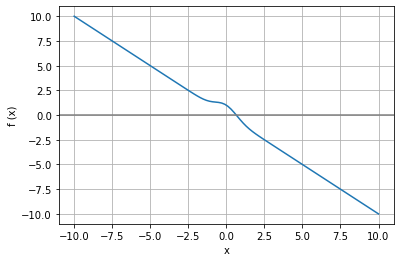

In [11]:
x = np.linspace(-10,10,100)
y = np.exp(-x**2)-x

plt.xlabel('x')
plt.ylabel('f (x)')
plt.plot(x,y)
plt.axhline(0, color='gray')
plt.grid()
plt.show()

In [12]:
def f(x):
    return np.exp(-x**2)-x
def f1(x):
    return -2*x*np.exp(-x**2) -1
round(met_newton(f,f1,0,30,1e-8),8)

0.65291864

<hr><b>3.4.4.</b> <br>
Isole e encontre as cinco primeiras raízes positivas da equação com 6
dígitos corretos através de traçado de gráfico e do método de Newton.
$$cos(10x) = e^{−x}$$
Dica: a primeira raiz positiva está no intervalo (0, 0,02). Fique atento

In [13]:
def f(x):
    return np.cos(10*x)-np.exp(-x)
def f1(x):
    return -10*np.sin(10*x) + np.exp(-x)

In [14]:
i = 0
n = 0
raiz=[]
while i < 2:
    if met_newton(f,f1,i,30,1e-6):
        raiz.append(round(met_newton(f,f1,i,30,1e-8),6))
    i=i+0.2

tmp_list=[]
for i in raiz:
    if i not in tmp_list:
        tmp_list.append(i)

print(tmp_list[0:5])

[0.019868, 0.53389, 0.735412, 1.13237, 1.388506]


<hr><b>3.4.5.</b> <br>
Encontre as raízes do polinômio $f(x) = x^4 − 4x^2 + 4 $ através do
método de Newton. O que você observa em relação ao erro obtido? Compare com
a situação do Problema 

In [15]:
def f(x):
    return x**4 - 4*x**2 + 4
def f1(x):
    return 4*x**3 - 8*x

In [16]:
def outro(F, F_dev, x0, qnt,prec):
    x = np.zeros(qnt)
    erro = []
    x[0] = x0
    for i in range (1, qnt):
        x[i] = x[i-1] - F(x[i-1])/F_dev(x[i-1])
        erro.append(abs(x[i]-x[i-1]))
        print('f({:.0f}) = {:7f}, erro = {:.8f}'.format(i,x[i],erro[i-1]))
        if erro[i-1] < prec:
            return x[i]
        
outro(f,f1,i,30,1e-7)

f(1) = 1.768081, erro = 0.26076673
f(2) = 1.608853, erro = 0.15922789
f(3) = 1.517420, erro = 0.09143301
f(4) = 1.467572, erro = 0.04984851
f(5) = 1.441378, erro = 0.02619415
f(6) = 1.427924, erro = 0.01345409
f(7) = 1.421102, erro = 0.00682212
f(8) = 1.417666, erro = 0.00343562
f(9) = 1.415942, erro = 0.00172406
f(10) = 1.415078, erro = 0.00086360
f(11) = 1.414646, erro = 0.00043220
f(12) = 1.414430, erro = 0.00021620
f(13) = 1.414322, erro = 0.00010812
f(14) = 1.414268, erro = 0.00005407
f(15) = 1.414241, erro = 0.00002704
f(16) = 1.414227, erro = 0.00001352
f(17) = 1.414220, erro = 0.00000676
f(18) = 1.414217, erro = 0.00000338
f(19) = 1.414215, erro = 0.00000169
f(20) = 1.414214, erro = 0.00000084
f(21) = 1.414214, erro = 0.00000042
f(22) = 1.414214, erro = 0.00000021
f(23) = 1.414214, erro = 0.00000011
f(24) = 1.414214, erro = 0.00000005


1.4142136155025797

Nada anormal, a precisão varia muito pouco e o valor novo também.

<hr><b>3.4.6.</b> <br>Encontre as raízes reais do polinômio $f(x) = \frac{x^5}{100} +x^4+3x+1$ isolando-as pelo método do gráfico e depois usando o método de Newton. Expresse a solução com 7 dígitos significativos.

In [17]:
def f(x):
    return ((x**5)/(100))+x**4+3*x+1
def f1(x):
    return ((5*x**4)/100)+4*x**3+3

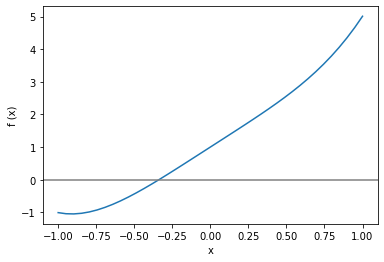

In [18]:
x = np.linspace(-1,1,40)
y = ((x**5)/(100))+x**4+3*x+1

plt.xlabel('x')
plt.ylabel('f (x)')
plt.plot(x,y)
plt.axhline(0, color='gray')
plt.show()

In [19]:
round(met_newton(f,f1,0,30,1e-7),7)

-0.3376513

<hr><b>3.4.7.</b> <br>
Considere o método de Newton aplicado para encontrar a raiz de
$f(x) = x^3 − 2x + 2$. O que acontece quando $x^{(0)} = 0$? Escolha um valor adequado para inicializar o método e obter a única raiz real desta equação.

In [20]:
def f(x):
    return x**3-2*x+2
def f1(x):
    return 3*x**2-2

In [21]:
for i in range (-2, 2):
    try:
        print('f({:.1f}) = {:.6f}'.format(i,met_newton(f,f1,i,20,1e-4)))
    except:
        pass

f(-2.0) = -1.769292
f(-1.0) = -1.769292


Se $x^{(0)} = 0$ temos que x[i] = x[i-1] - F(x[i-1])/F_dev(x[i-1]) = 
x[i] = $0 - \frac{F{0}} {F'{0}}$ =$ 0 - \frac{2}{-2} = 0$., em seguida esse teremos 1, criando um loop. 

Ver codigo abaixo.

In [22]:
def outro(F, F_dev, x0, qnt,prec):
    x = np.zeros(qnt)
    erro = []
    x[0] = x0
    for i in range (1, qnt):
        x[i] = x[i-1] - F(x[i-1])/F_dev(x[i-1])
        erro.append(abs(x[i]-x[i-1]))
        print('f({:.0f}) = {:7f}'.format(i,x[i]))
        if erro[i-1] < prec:
            return x[i]
        
outro(f,f1,i,10,1e-4)

f(1) = 0.000000
f(2) = 1.000000
f(3) = 0.000000
f(4) = 1.000000
f(5) = 0.000000
f(6) = 1.000000
f(7) = 0.000000
f(8) = 1.000000
f(9) = 0.000000
